In [206]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#https://www.qdusa.com/sitedocs/UnitsChart.pdf

p = 6871 #density
M = 1.05319  #molar mass  material 
m = 22.01*10**(-6) #mass of sample
S = 3.0/2.0 #spin
T = 0.55 #temperature

#SI units throughout
mu_0 = 4*np.pi*10**(-7)
k_B = 1.38064852*10**(-23)
mu_B = 9.274009994*10**(-24)
n = 3.0/(288.61*10**(-30))
r = 4.20*10**(-10) #Nd-Nd distance
g = 0.727 #why this g-factor?????
N_A = 6.02214085*10**(23)
#susc = (p/M)*(1.19029337821*10**(-5)) #volume susceptibility calculated at T=1.8106K

M0 = 1./(3.*N_A*(m/M)) #bohr magneton per Nd
#M0 = 1.0/m #emu/g units
#M0 = 4*np.pi*10**(-6)*1.0/(m/p) #SI units?

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in subtract


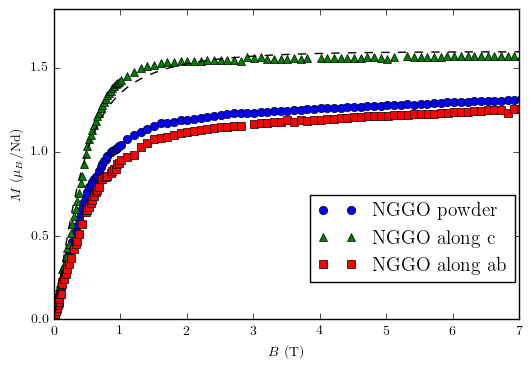

In [207]:
#CRYSTALLOGRAPHIC DIRECTIONS

m=6.56*10**(-6)
M0 = 1./(3.*N_A*(m/M)) #bohr magneton per Nd

MAG_C = np.genfromtxt('Nd3GeGa5O14_MvsH_c_0p5K.dc.idt',delimiter=',',skip_header=8)
MAG_AB = np.genfromtxt('Nd3GeGa5O14_MvsH_0p5K_ab_plane.dc.idt',delimiter=',',skip_header=9)
MAG_P = np.genfromtxt('Nd3GeGa5O14_powder_MvH_0p5K.dc.idt',delimiter=',',skip_header=9)

field_C = MAG_C[:,1]
mag_C = M0*MAG_C[:,3]
reg_C = MAG_C[:,5]
#ALL IN SI UNITS HERE!
emm_C = p*MAG_C[:,3]/(1000*m)
haitch_C = field_C*1000/(4.*np.pi)
bee_C = (haitch_C+emm_C)*mu_0

field_AB = MAG_AB[:,1]
mag_AB = M0*MAG_AB[:,3]
reg_AB = MAG_AB[:,5]
emm_AB = p*MAG_AB[:,3]/(1000*m)
haitch_AB = field_AB*1000/(4.*np.pi)
bee_AB = (haitch_AB+emm_AB)*mu_0

#POWDER
m=22.01*10**(-6)
M0 = 1./(3.*N_A*(m/M)) #bohr magneton per Nd
field_P = MAG_P[:,1]
mag_P = M0*MAG_P[:,3]
reg_P = MAG_P[:,5]
emm_P = p*MAG_P[:,3]/(1000*m)
haitch_P = field_P*1000/(4.*np.pi)
bee_P = (haitch_P+emm_P)*mu_0
R=0.986

x = np.linspace(0, 7, 400)
plt.plot(field_P[reg_P>R]/10000, mag_P[reg_P>R]/(1000*mu_B), 'o', color='blue', label="NGGO powder")
plt.plot(field_C[reg_C>R]/10000, mag_C[reg_C>R]/(1000*mu_B), '^', color='green', label="NGGO along c")
plt.plot(field_AB[reg_AB>R]/10000, mag_AB[reg_AB>R]/(1000*mu_B), 's', color='red', label="NGGO along ab")
plt.plot(x, M0*fit(x,A)/(p/(1000*m))/(1000*mu_B), color='black', linestyle='dashed')
plt.legend(bbox_to_anchor=(0.55, 0.4), fontsize=14, loc=2, borderaxespad=0.)
plt.xlim([0,7])
plt.ylim([0,1.85])
plt.xlabel("$B$ (T)")
plt.ylabel("$M$ ($\\mu_B$/Nd)")
plt.savefig('powder.png')
plt.rcParams["figure.figsize"] = [8,5]
plt.show()
plt.close()



In [208]:
#fitting

j=9/2
def fit(x,A):
    return A*g*n*mu_B*j*((2.*j+1.)/(2*j*np.tanh((2.*j+1.)*g*mu_B*j*x/(k_B*T*2*j)))-1.0/(2.*j*np.tanh(g*mu_B*j*x/(k_B*T*2*j))))
#best guess
p0 = [0.8]
#curve fitting
popt, pcov = curve_fit(fit, field_C[reg_C>R]/10000, emm_C[reg_C>R], p0)
perr = np.sqrt(np.diag(pcov))
residuals = emm_C[reg_C>R] - fit(field_C[reg_C>R]/10000, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((emm_C[reg_C>R]-np.mean(emm_C[reg_C>R]))**2)
r_squared = 1 - (ss_res / ss_tot)
#parameters of fit
print(r_squared)
print(popt)
print(perr)
A=popt


0.991100953503
[ 0.55369194]
[ 0.00190619]


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in subtract


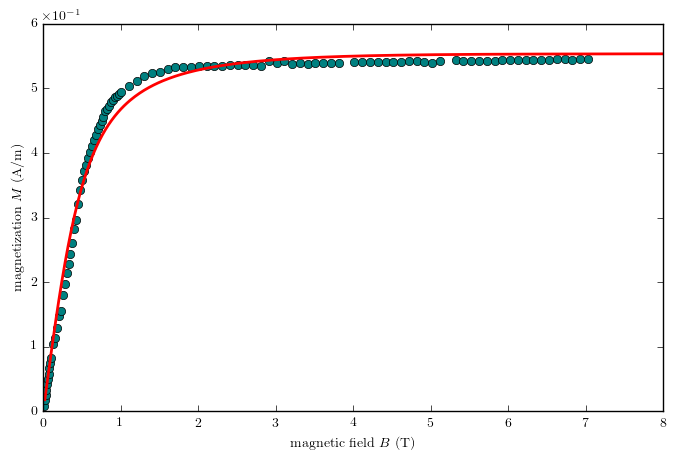

In [209]:
x = np.linspace(0, 8, 400)
plt.plot(field_C[reg_C>R]/10000, emm_C[reg_C>R]/(g*n*mu_B*j), 'o', color='teal', label="Nd-Ti",markersize=6)
plt.plot(x, fit(x,A)/(g*n*mu_B*j), color='red',label="Nd-Ti",linewidth=2)
#plt.plot(x, fit(x,A,j)/A, color='red',label="Nd-Ti",linewidth=2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("magnetic field $B$ (T)")
plt.ylabel("magnetization $M$ (A/m)")
plt.savefig('NTGO_mag_powder.eps')
plt.rcParams["figure.figsize"] = [6,4]
#plt.xlim([0,7])
#plt.ylim([0,120001])
plt.show()
plt.close()


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in subtract


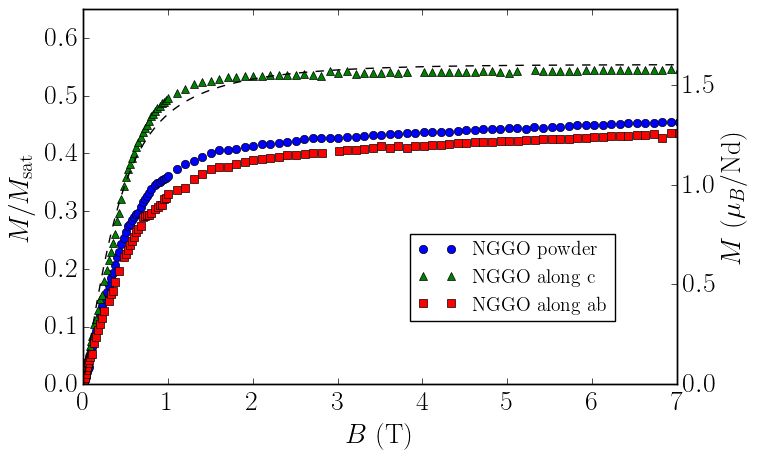

In [211]:
plt.rcParams.update({'font.size': 20})
fig, ax1 = plt.subplots()
ax1.set_xlabel('$B$ (T)')
plt.plot(field_P[reg_P>R]/10000, emm_P[reg_P>R]/(g*n*mu_B*j), 'o', color='blue', label="NGGO powder")
plt.plot(field_C[reg_C>R]/10000, emm_C[reg_C>R]/(g*n*mu_B*j), '^', color='green', label="NGGO along c")
plt.plot(field_AB[reg_AB>R]/10000, emm_AB[reg_AB>R]/(g*n*mu_B*j), 's', color='red', label="NGGO along ab")
plt.plot(x, fit(x,A)/(g*n*mu_B*j), color='black', linestyle='dashed')
plt.legend(bbox_to_anchor=(0.55, 0.4), fontsize=14, loc=2, borderaxespad=0.)
ax1.set_ylabel('$M/M_\mathrm{sat}$')
ax1.tick_params(axis='y')
plt.xlim([0,7])
plt.ylim([0,0.65])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('$M$ ($\\mu_B$/Nd)')  # we already handled the x-label with ax1
#ax2.plot(field_C[reg_C>R]/10000, mag_C[reg_C>R]/(1000*mu_B), '^', color='teal')
ax2.tick_params(axis='y')
ax2.set_xlim([0,7])
ax2.set_ylim([0,1.88])
plt.rcParams["figure.figsize"] = [8,5]
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('NGGO_mag.eps')
plt.show()